# Cox-Munk Distribution

The Cox-Munk distribution is a bivariate (an)isotropic Gaussian that describes the distribition of wave surface-facet slopes with respect to wind speed.

In [855]:
import numpy as np

In [856]:
# "Peakedness" coefficients
c_40 = 0.40
c_22 = 0.12
c_04 = 0.23


In [857]:
# Skewness coefficients
c_21 = lambda u: 0.01 - 0.0086 * u
c_03 = lambda u: 0.02 - 0.0023 * u

In [858]:
# RMS of Z_x and Z_y
s_c_sqr = lambda u: 0.003 + 0.00192 * u
s_u_sqr = lambda u: 0.00316 * u

In [859]:
def z_x(t_o, t_i, phi):
    return (-np.sin(t_o) * np.sin(phi)) / (np.cos(t_i) * np.cos(t_o))

def z_y(t_o, t_i, phi):
    return (np.sin(t_i) + np.sin(t_o) * np.cos(phi)) / (np.cos(t_i) * np.cos(t_o))

In [860]:
def z_x_prime(t_o, t_i, chi):
    return z_x(t_o, t_i, chi) * np.cos(chi) + z_y(t_o, t_i, chi) * np.sin(chi)

def z_y_prime(t_o, t_i, chi):
    return -z_x(t_o, t_i, chi) * np.sin(chi) + z_y(t_o, t_i, chi) * np.cos(chi)

In [861]:
def ksi(t_o, t_i, chi, u):
    return z_x_prime(t_o, t_i, chi) / np.sqrt(s_c_sqr(u))

def eta(t_o, t_i, chi, u):
    return z_y_prime(t_o, t_i, chi) / np.sqrt(s_u_sqr(u))

In [862]:
# Actual distribution PDF
def spec_prob(t_o, t_i, p_i, p_u, u):
    chi = p_i - p_u
    s_c = np.sqrt(s_c_sqr(u))
    s_u = np.sqrt(s_u_sqr(u))
    ksi_val = ksi(t_o, t_i, chi, u)
    eta_val = eta(t_o, t_i, chi, u)
    ksi_sqr = ksi_val ** 2
    eta_sqr = eta_val ** 2
    norm_factor = 1 / (2 * np.pi * s_c * s_u)
    exp_factor = np.exp(-0.5 * (ksi_sqr + eta_sqr))
    a = (c_21(u) / 2.0) * (ksi_sqr - 1.0) * eta_val
    b = (c_03(u) / 6.0) * (eta_sqr * eta_val - 3.0 * eta_val)
    c = (c_40 / 24.0) * (ksi_sqr ** 2 - 6.0 * ksi_sqr + 3.0)
    d = (c_22 / 4.0) * (ksi_sqr - 1.0) * (eta_sqr - 1.0)
    e = (c_04 / 24.0) * (eta_sqr ** 2 - 6.0 * eta_sqr + 3.0)
    return norm_factor * exp_factor * (1.0 - a - b + c + d + e)

In [863]:
# Initialize wind speed and direction
wind_speed = 10
wind_azimuth = 0.0

# Initialize the solar angles
res = 50
zeniths = np.linspace(0, np.pi, res)
azimuths = np.linspace(0, 2 * np.pi, res)

In [864]:
# Define the number of angles
N = 91
zenith_vs = np.linspace(0, np.pi / 2, N)

# For each zenith, compute the probability
zenith_dict = {}
idx = 0
max_idx = len(zenith_vs)
max_prob = 0
for zenith_v in zenith_vs:
    pdf = np.zeros((res, res))
    for i, zenith_s in enumerate(zeniths):
        for j, azimuth_s in enumerate(azimuths):
            prob = spec_prob(zenith_v, zenith_s, azimuth_s, wind_azimuth, wind_speed)
            pdf[i, j] = prob
            if prob > max_prob:
                max_prob = prob
    
    zenith_dict[zenith_v] = pdf
    idx = idx + 1
    print(f"Progress: {idx}/{max_idx}")

# Normalize the probabilities

for zenith_v in zenith_dict:
    zenith_dict[zenith_v] = zenith_dict[zenith_v] / max_prob



Progress: 1/90
Progress: 2/90
Progress: 3/90
Progress: 4/90
Progress: 5/90
Progress: 6/90
Progress: 7/90
Progress: 8/90
Progress: 9/90
Progress: 10/90
Progress: 11/90
Progress: 12/90
Progress: 13/90
Progress: 14/90
Progress: 15/90
Progress: 16/90
Progress: 17/90
Progress: 18/90
Progress: 19/90
Progress: 20/90
Progress: 21/90
Progress: 22/90
Progress: 23/90
Progress: 24/90
Progress: 25/90
Progress: 26/90
Progress: 27/90
Progress: 28/90
Progress: 29/90
Progress: 30/90
Progress: 31/90
Progress: 32/90
Progress: 33/90
Progress: 34/90
Progress: 35/90
Progress: 36/90
Progress: 37/90
Progress: 38/90
Progress: 39/90
Progress: 40/90
Progress: 41/90
Progress: 42/90
Progress: 43/90
Progress: 44/90
Progress: 45/90
Progress: 46/90
Progress: 47/90
Progress: 48/90
Progress: 49/90
Progress: 50/90
Progress: 51/90
Progress: 52/90
Progress: 53/90
Progress: 54/90
Progress: 55/90
Progress: 56/90
Progress: 57/90
Progress: 58/90
Progress: 59/90
Progress: 60/90
Progress: 61/90
Progress: 62/90
Progress: 63/90
P

In [865]:
# Clear all files in cox_munk
import os

for file in os.listdir("cox_munk"):
    os.remove(os.path.join("cox_munk", file))

In [866]:
# Plot the PDF as a heatmap
import matplotlib.pyplot as plt

images = []
idx = 0

for zenith, pdf in zenith_dict.items():
    # Make plot as a heatmap
    plt.imshow(pdf, cmap='turbo', interpolation='quadric', extent=[0, 2 * np.pi, 0, np.pi])

    # Name the axes
    plt.xlabel("Solar Azimuth (rad)")
    plt.ylabel("Solar Zenith (rad)")

    # Add the title
    degrees = np.degrees(zenith)

    # Round to 2 decimal places
    degrees = round(degrees, 2)

    plt.title("Viewing Zenith = " + str(degrees))

    # Save the image
    filename = "cox_munk/" + str(degrees) + ".png"
    plt.savefig(filename)

    idx = idx + 1
    print(f"Progress: {idx}/{max_idx}")

# Stop viewing the plot
plt.close()

Progress: 1/90
Progress: 2/90
Progress: 3/90
Progress: 4/90
Progress: 5/90
Progress: 6/90
Progress: 7/90
Progress: 8/90
Progress: 9/90
Progress: 10/90
Progress: 11/90
Progress: 12/90
Progress: 13/90
Progress: 14/90
Progress: 15/90
Progress: 16/90
Progress: 17/90
Progress: 18/90
Progress: 19/90
Progress: 20/90
Progress: 21/90
Progress: 22/90
Progress: 23/90
Progress: 24/90
Progress: 25/90
Progress: 26/90
Progress: 27/90
Progress: 28/90
Progress: 29/90
Progress: 30/90
Progress: 31/90
Progress: 32/90
Progress: 33/90
Progress: 34/90
Progress: 35/90
Progress: 36/90
Progress: 37/90
Progress: 38/90
Progress: 39/90
Progress: 40/90
Progress: 41/90
Progress: 42/90
Progress: 43/90
Progress: 44/90
Progress: 45/90
Progress: 46/90
Progress: 47/90
Progress: 48/90
Progress: 49/90
Progress: 50/90
Progress: 51/90
Progress: 52/90
Progress: 53/90
Progress: 54/90
Progress: 55/90
Progress: 56/90
Progress: 57/90
Progress: 58/90
Progress: 59/90
Progress: 60/90
Progress: 61/90
Progress: 62/90
Progress: 63/90
P

In [867]:
# Create gif animation
import imageio

filesnames = ["cox_munk/" + str(round(np.degrees(zenith), 2)) + ".png" for zenith in zenith_vs]

images = [imageio.imread(filename) for filename in filesnames]
imageio.mimsave('cox_munk/animation.gif', images, duration=5)

/var/folders/2y/rhmx4lpx7yj6c8p50ldw1x_c0000gp/T/ipykernel_90831/2504805664.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(filename) for filename in filesnames]


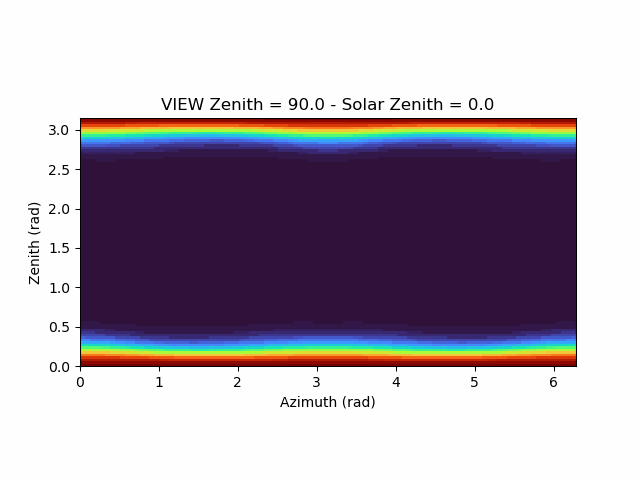

In [869]:
# display the animation
from IPython.display import Image

Image("cox_munk/animation.gif")